In [1]:
import numpy as np
from astropy.timeseries import BoxLeastSquares
import matplotlib.pyplot as plt

from dataInteraction import read_data, parameter_lookup

In [2]:
def calc_period(epic, campaign, print_vals=False):    
    model = read_data(epic, campaign, verbose=False)
    t = model.lightcurve.time
    y = model.lightcurve.flux
    dy = model.lightcurve.flux_err

    bls = BoxLeastSquares(t, y, dy)
    #periods = np.linspace(0.7, 30, 5000)
    durations = [0.05,0.1,0.2]
    periodogram = bls.autopower(durations)
    
    max_power = np.argmax(periodogram.power)

    if print_vals:
        plt.plot(periodogram.period, periodogram.power, 'k')
        plt.xlabel("Period [d]")
        plt.ylabel("BLS Likelihood")
        plt.show()
        
        print(periodogram.period[max_power])
        print(periodogram.duration[max_power])
        print(periodogram.transit_time[max_power])

        stats = bls.compute_stats(periodogram.period[max_power],
                                  periodogram.duration[max_power],
                                  periodogram.transit_time[max_power])
        print("")
        for k in stats:
            print(k, ":", stats[k])

    return (periodogram.transit_time[max_power], periodogram.period[max_power])

Reference parameters: t0=2308.7108264371577, period=10.366760220864801, num_transits=8
Reference parameters: t0=2315.2107203124847, period=12.279463623813122, num_transits=6
Reference parameters: t0=2324.090583057889, period=23.12765265777745, num_transits=3
Reference parameters: t0=2307.6607526633716, period=1.610964002081483, num_transits=46
Reference parameters: t0=2310.14054033626, period=5.313145416852025, num_transits=14
Reference parameters: t0=2306.6163236169186, period=2.2190974583631986, num_transits=34
Reference parameters: t0=2308.9907322105964, period=2.6450914938746535, num_transits=28
Reference parameters: t0=2324.2104577046643, period=30.85385398985691, num_transits=2
Reference parameters: t0=2308.9362282614047, period=3.848614911889818, num_transits=19
Reference parameters: t0=2335.966056566966, period=29.38213021701952, num_transits=2
Reference parameters: t0=2325.7611476577645, period=19.492700820086107, num_transits=3
Reference parameters: t0=2309.495744185542, peri

Reference parameters: t0=2306.690654720367, period=1.7244512114460548, num_transits=44
Reference parameters: t0=2309.886270807014, period=35.39572646299712, num_transits=3
Reference parameters: t0=2311.860598993284, period=7.80670681262259, num_transits=9
Reference parameters: t0=2336.850219115653, period=32.58933588413899, num_transits=2
Reference parameters: t0=2315.5007203949067, period=16.994879153143142, num_transits=4
Reference parameters: t0=2308.845328716488, period=3.411174178186317, num_transits=22
Reference parameters: t0=2309.4106702832332, period=3.4767220879593905, num_transits=21
Reference parameters: t0=2310.5757566410502, period=5.792238305257758, num_transits=13
Reference parameters: t0=2313.3208613077377, period=9.845241887541707, num_transits=7
Reference parameters: t0=2308.095891799239, period=7.729519343635684, num_transits=10
Reference parameters: t0=2307.3656477922586, period=0.8218145775020925, num_transits=91
Reference parameters: t0=2308.5203491762477, period

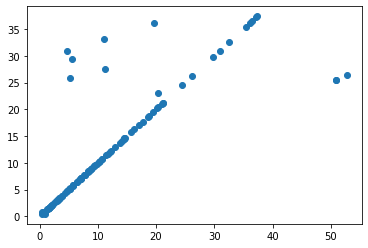

In [2]:
with open("Data/EPIC_list.txt", 'r') as f:
    epics = [int(line[:-1]) for line in f.readlines()]

p_found = []
p_calc = []
    
for epic in epics:
    t0_f, p_f = parameter_lookup(epic, verbose=False)    
    if p_f is None: continue
    p_c = read_data(epic, campaign=5, lookup_pars=False, verbose=False).p_ref
        
    p_found.append(p_f)
    p_calc.append(p_c)
    
plt.scatter(p_found, p_calc)

In [3]:
count = 0
for i in range(len(p_found)):
    p_c = p_calc[i]
    p_f = p_found[i]
    
    if (p_c > p_f*0.95 and p_c < p_f*1.05):
        count += 1

print(f"{count} calculated periods are within 5% of the {len(p_calc)} pre-recorded values.")

95 calculated periods are within 5% of the 107 pre-recorded values.
